In [1]:
cd '/home/dfried/projects/onecommon/aaai2020/experiments'

/home/dfried/projects/onecommon/aaai2020/experiments


In [2]:
import models
import data
import utils
from domain import get_domain

In [3]:
domain = get_domain('one_common')
unk_threshold = 10
model_ty = models.get_model_type('rnn_reference_model')

ctx_encoder_type = 'rel_attn_encoder'

# model is actually in "serialized_models/{model_fname}"
# model_fname = 'rel_tsel_ref_dial_model/default_0_best.th'

# # valid_lang_loss 2.2762        valid_select_loss 0.8293        valid_select_acc 0.6859 valid_ref_loss 0.2897
# model_fname = 'rel2_tsel_ref_dial_model/hierarchical_rel-enc-2_rel-pool-max_mask-pad_1_best.th'

# # valid_lang_loss 2.2609        valid_select_loss 0.9497        valid_select_acc 0.6291         valid_ref_loss 0.3191
# model_fname = 'rel2_tsel_ref_dial_model/hierarchical_rel-enc-2_rel-pool-max_mask-pad_feed-ctx-attend_1_best.th'

# valid_lang_loss 
# # valid_lang_loss 2.2544        valid_select_loss 0.8247        valid_select_acc 0.7062         valid_ref_loss 0.2852
# model_fname = 'rel2_tsel_ref_dial_model_no-share/hierarchical_mask-pad_feed-context-attend-separate_1_best.th'

# valid_lang_loss 2.2448        valid_select_loss 0.9233        valid_select_acc 0.6455         valid_ref_loss 0.3180
model_fname = 'rel2_tsel_ref_dial_model_no-share/hierarchical_mask-pad_selection-attention_feed-context-attend-separate_no-word-attention_1_best.th'

In [4]:
seed = 0
corpus = model_ty.corpus_ty(domain, 'data/onecommon',
                            train='train_reference_{}.txt'.format(seed),
                            valid='valid_reference_{}.txt'.format(seed),
                            test='test_reference_{}.txt'.format(seed),
                            freq_cutoff=unk_threshold, verbose=True)

dataset data/onecommon/train_reference_0.txt, total 544674, unks 4134, ratio 0.76%
dataset data/onecommon/valid_reference_0.txt, total 70004, unks 720, ratio 1.03%
dataset data/onecommon/test_reference_0.txt, total 67008, unks 576, ratio 0.86%


In [5]:
corpus

In [6]:
model = utils.load_model(model_fname, map_location='cpu')

In [7]:
batchsize=1
validset, validset_stats = corpus.valid_dataset(batchsize)

In [8]:
validset_stats

{'n': 70004, 'nonpadn': 70004}

In [9]:
# ctx: this player's dots
# inpt / tgt: dialogue word indices (tgt are shifted by 1)
# ref_inpt

In [10]:
for (input_vals, word_idxs, referent_idxs, output_idx, scenario_id, real_ids, agent, chat_id) in corpus.train:
    if 'C_d0de3d0144df405e998ae718539ff9a4' == chat_id:
        print('found it')
        break

found it


In [11]:
import torch

In [12]:
torch.LongTensor(referent_idxs).resize(5, 10)

/home/dfried/anaconda2/envs/onecommon/lib/python3.6/site-packages/torch/tensor.py:314: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


tensor([[ 3,  6, 15,  0,  1,  0,  0,  0,  0,  0],
        [ 8, 12, 15,  1,  0,  0,  0,  0,  0,  0],
        [14, 14, 15,  0,  1,  0,  0,  0,  0,  0],
        [45, 47, 64,  0,  0,  0,  1,  0,  0,  0],
        [61, 62, 64,  0,  1,  0,  0,  0,  0,  0]])

In [13]:
trainset, trainse_stats = corpus.train_dataset(1)

In [14]:
for ix in range(len(trainset)):
    ctx, inpt, tgt, ref_inpt, ref_tgt, sel_tgt, \
    scenario_ids, real_ids, agents, chat_ids, sel_idxs = trainset[ix]
    if 'C_d0de3d0144df405e998ae718539ff9a4' in chat_ids:
        print("found it")
        break

found it


In [15]:
chat_ids

['C_d0de3d0144df405e998ae718539ff9a4']

In [16]:
inpt.size()

torch.Size([82, 1])

In [17]:
ref_inpt.size()

torch.Size([1, 5, 3])

In [18]:
ref_inpt[0]

tensor([[ 3,  6, 15],
        [ 8, 12, 15],
        [14, 14, 15],
        [45, 47, 64],
        [61, 62, 64]])

In [19]:
chat_ids

['C_d0de3d0144df405e998ae718539ff9a4']

In [20]:
' '.join(corpus.word_dict.get_word(idx) for idx in inpt[:,0])

'YOU: i see a dark grey dot with a slightly smaller darker dot below it <eos> THEM: i think i have that too . above the larger one and to its left i have a much smaller medium gray dot <eos> YOU: yes i have the smaller grey to the upper left as well . which do we click on ? the middle ? <eos> THEM: lets click on the large one you mentioned first . <eos> YOU: ok good luck <selection>'

In [21]:
ref_tgt

tensor([[[0, 1, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0]]])

In [22]:
ix = 0
for ref_ix in range(ref_inpt.size(1)):
    print(ref_inpt[ix,ref_ix])
    print(' '.join(corpus.word_dict.get_word(idx) for idx in  inpt[:,ix][ref_inpt[ix,ref_ix,0]:ref_inpt[ix,ref_ix,1]+1]))

tensor([ 3,  6, 15])
a dark grey dot
tensor([ 8, 12, 15])
a slightly smaller darker dot
tensor([14, 14, 15])
it
tensor([45, 47, 64])
the smaller grey
tensor([61, 62, 64])
the middle


In [23]:
ref_inpt

tensor([[[ 3,  6, 15],
         [ 8, 12, 15],
         [14, 14, 15],
         [45, 47, 64],
         [61, 62, 64]]])

In [24]:
ref_tgt

tensor([[[0, 1, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0]]])

In [25]:
# self-play emulation

In [26]:
from agent import RnnAgent

In [27]:
from selfplay import make_parser

In [28]:
parser = make_parser()
args = parser.parse_args('--temperature 0.25'.split())

In [29]:
alice = RnnAgent(model, args)
bob = RnnAgent(model, args)

In [30]:
import json
from utils import ContextGenerator

In [31]:
ctx_gen = ContextGenerator('data/onecommon/shared_5.txt')

In [32]:
with open('data/onecommon/shared_5.json', "r") as f:
    scenario_list = json.load(f)
scenarios = {scenario['uuid']: scenario for scenario in scenario_list}

In [33]:
scenarios

{'S_oYfLITuo49SnN3HU': {'kbs': [[{'x': 44,
     'id': '4',
     'color': 'rgb(172,172,172)',
     'y': 200,
     'size': 10},
    {'x': 232, 'id': '17', 'color': 'rgb(155,155,155)', 'y': 139, 'size': 8},
    {'x': 108, 'id': '44', 'color': 'rgb(197,197,197)', 'y': 257, 'size': 12},
    {'x': 155, 'id': '46', 'color': 'rgb(195,195,195)', 'y': 253, 'size': 12},
    {'x': 364, 'id': '48', 'color': 'rgb(150,150,150)', 'y': 89, 'size': 8},
    {'x': 118, 'id': '64', 'color': 'rgb(60,60,60)', 'y': 62, 'size': 11},
    {'x': 79, 'id': '74', 'color': 'rgb(85,85,85)', 'y': 302, 'size': 11}],
   [{'x': 196, 'id': '17', 'color': 'rgb(155,155,155)', 'y': 107, 'size': 8},
    {'x': 218, 'id': '26', 'color': 'rgb(135,135,135)', 'y': 403, 'size': 11},
    {'x': 71, 'id': '44', 'color': 'rgb(197,197,197)', 'y': 225, 'size': 12},
    {'x': 118, 'id': '46', 'color': 'rgb(195,195,195)', 'y': 220, 'size': 12},
    {'x': 327, 'id': '48', 'color': 'rgb(150,150,150)', 'y': 56, 'size': 8},
    {'x': 42, 'id':

In [34]:
def is_selection(out):
    return '<selection>' in out

In [35]:
pdb on

Automatic pdb calling has been turned ON


In [36]:
from dialog import DialogLogger

In [37]:
from IPython.display import SVG, display, HTML

In [38]:
def display_svgs(svgs):
    no_wrap_div = '<div style="white-space: nowrap">' + ''.join(svgs) + '</div>'
    display(HTML(no_wrap_div))

In [39]:
scenario = None
for ix, ([scenario_id], (ctx1, ctx2), (ids1, ids2)) in enumerate(ctx_gen.iter()):
#     if scenario_id == 'S_11J8n40u4HRVduwi':
#         print('found it')
#         scenario = scenarios[scenario_id]
#         break
    if ix == 4:
        scenario = scenarios[scenario_id]
        break

In [40]:
print(scenario_id)

S_KlTPi9V8UkuLuzHy


In [45]:
scenario = scenarios[scenario_id]
for agent, agent_id, ctx, real_ids in zip([alice, bob], [0, 1], [ctx1, ctx2], [ids1, ids2]):
    agent.feed_context(ctx)
    agent.real_ids = real_ids
    agent.agent_id = agent_id
    
samples = 10
    
writer, reader = [alice, bob]
conv = []
speaker = []
words_left = 5000

def display_attn(attn, agent_id, name=None):
    attn = attn.flatten().detach().numpy()
    if name is not None:
        print("{}: {}".format(name, attn))
    display_svgs([DialogLogger._scenario_to_svg(scenario)[agent_id], DialogLogger._attention_to_svg(scenario, agent_id, attn)])
    
while True:
    for _ in range(samples):
        outs, _, _, _, extra = writer.model.write(writer.ctx_h, writer.lang_h, words_left, writer.args.temperature)
        print('{}\t{}'.format(writer.agent_id, ' '.join(writer._decode(outs.narrow(0,1,outs.size(0)-1), writer.model.word_dict))))
    out = writer.write(max_words=words_left)
    
    display_attn(writer.extras[-1]['dot_attention1'], writer.agent_id, name='feed attention')
    
    if 'dot_attention2_mean' in writer.extras[-1]:
        display_attn(writer.extras[-1]['dot_attention2_mean'], writer.agent_id, name='word attention mean')
        
    for ix, ix_attn in enumerate(writer.extras[-1]['dot_attention2s']):
        display_attn(ix_attn, writer.agent_id, name='t {}: {}'.format(ix, out[ix]))
        
    print('{}\t{}'.format(writer.agent_id, ' '.join(out)))
    print()
    words_left -= len(out)
    conv.append(out)
    speaker.append(writer.agent_id)
    reader.read(out)
    if is_selection(out) or words_left <= 1:
        break
    writer, reader = reader, writer

0	i have a large black dot with a smaller dark dot to the left of it <eos>
0	i have a large black dot with a smaller black dot to the left of it <eos>
0	i have a large black dot with a smaller light grey dot to the right of it <eos>
0	i have a large black dot , with a smaller lighter dot to the right of it <eos>
0	i have a large black dot with a smaller black dot above and to the right of it <eos>
0	i have a large black dot with a smaller light grey dot above and to the left of it <eos>
0	i have a large black dot with a smaller black dot to the right of it <eos>
0	i have a large black dot with a smaller lighter dot above and to the left of it <eos>
0	i have a large black dot with a smaller lighter dot above and to the right of it <eos>
0	i have a large black dot with a smaller black dot to the right of it <eos>
feed attention: [0.13165084 0.1639878  0.13257754 0.16190946 0.11384555 0.16943642
 0.12659246]


0	i have a large black dot with a larger black dot above and to the left of it <eos>

1	i have a large black dot with a smaller light grey dot to the right of it <eos>
1	i have a large black dot with a smaller light grey dot above and to the right of it <eos>
1	i see it , lets choose the black dot <selection>
1	i have a large black dot with a smaller black dot to the left of it <eos>
1	i see a large black dot with a smaller light grey dot to the left of it <eos>
1	i have a large black dot with a smaller lighter dot to the left and slightly above it <eos>
1	i have a large black dot with a smaller lighter dot to the right of it <eos>
1	i have a large black dot with a smaller light gray dot to the left of it <eos>
1	i have a large black dot with a large light grey dot to the left of it <eos>
1	i see a large black dot with a smaller light grey dot to the right of it <eos>
feed attention: [0.16396154 0.14860073 0.15196735 0.14598624 0.12670152 0.13539582
 0.1273868 ]


1	i have a large black dot with a smaller light gray dot to the left of it <eos>

0	i have that . let 's pick the black dot <selection>
0	i have that too . let 's pick the black dot <selection>
0	i have that . let 's pick the black dot <selection>
0	i have that too . let 's pick the large black dot . <selection>
0	i have a large black dot with a smaller dark dot above and to the left of it <eos>
0	i have that . click the black dot <selection>
0	i have that too . <eos>
0	i have a large black dot with a smaller light grey dot to the right of it <eos>
0	i have a large black dot with a smaller black dot to the right and slightly below <eos>
0	i have that too . let 's pick the black dot <selection>
feed attention: [0.12426568 0.18941864 0.13626207 0.15239027 0.11884631 0.14729226
 0.13152471]


0	i have that . let 's pick the large black dot <selection>



In [49]:
print(alice.agent_id)
alice.extras

0


[{'dot_attention1': tensor([[0.1003, 0.1475, 0.1571, 0.1363, 0.1630, 0.1580, 0.1379]],
         grad_fn=<SqueezeBackward1>),
  'dot_attention2': tensor([[0.0077, 0.3399, 0.3212, 0.0676, 0.1570, 0.0876, 0.0189]],
         grad_fn=<SoftmaxBackward>)},
 {'dot_attention1': tensor([[0.0496, 0.1959, 0.1835, 0.1367, 0.1656, 0.1476, 0.1212]],
         grad_fn=<SqueezeBackward1>),
  'dot_attention2': tensor([[0.0903, 0.1870, 0.1722, 0.1399, 0.1518, 0.1366, 0.1223]],
         grad_fn=<SoftmaxBackward>)},
 {'dot_attention1': tensor([[0.0526, 0.1981, 0.1840, 0.1401, 0.1653, 0.1456, 0.1144]],
         grad_fn=<SqueezeBackward1>),
  'dot_attention2': tensor([[1.4260e-05, 8.6649e-01, 1.2641e-01, 1.2068e-03, 5.7943e-03, 6.9202e-05,
           1.7913e-05]], grad_fn=<SoftmaxBackward>)}]

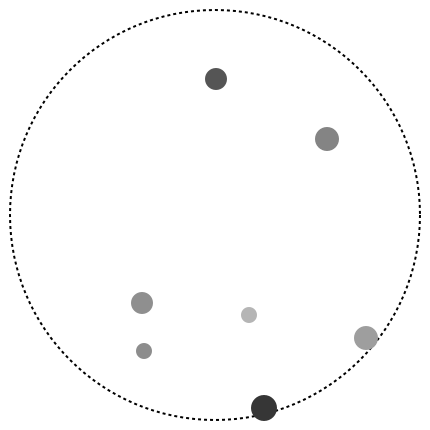

In [53]:
display(SVG(DialogLogger._scenario_to_svg(scenario)[0]))